### plot a line graph showing student loan repayment

In [65]:
#import anything we might need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
#define fixed variables
min_payment = 1000
monthly_interest = .0036
loan_amount = 48000

In [67]:
#declare list to add values to, preparing for mapping to dictionary
loan_list = []

In [68]:
#add loan amount and interest acrrued as value
while loan_amount > 0:
    
    #calculate interest
    monthly_accrual = ( loan_amount * monthly_interest )
    
    #add interest to months total
    loan_amount = loan_amount + monthly_accrual
    
    #subtract payment for following month's total
    monthly_total = loan_amount - min_payment
    
    #update next month's starting amount
    loan_amount = monthly_total
    
    #create key-value pai
    pair = ( monthly_total , monthly_accrual )
        
    loan_list.append( pair )

In [69]:
#create indeces for keys
index_loans = [ num for num in range( 0 , len( loan_list ) ) ]

In [70]:
#map pair to key into dictionary
loan_dict = { index_loans[ i ]: loan_list[ i ] for i in range( len( loan_list ) ) }

In [71]:
#map dictionary into dataframe
loan_df = pd.DataFrame.from_dict( loan_dict , orient = 'index' )

In [72]:
def plot_data( df ):
    
    plt.figure( figsize = (14,6))
    
    plt.subplot( 1 , 2 , 1 )
    df[ 0 ].plot()
    plt.xlabel( 'Balance' )
    
    plt.subplot( 1 , 2 , 2 )
    sns.histplot( data = loan_df[ 1 ] )
    plt.xlabel( 'AcruedInterest' )
    
    plt.show()

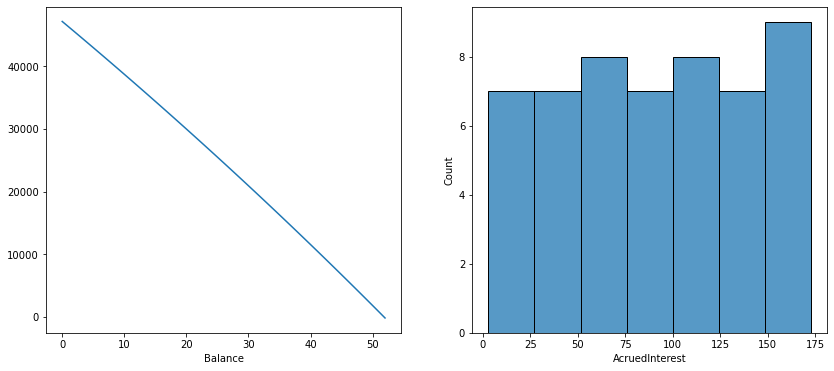

In [73]:
plot_data( loan_df )